# Problem 5
The last question that I am interested in if the cereals are to be served cold or hot. Also I want to understand the nutrition of the cereal on each shelf so the next time I go to the grocery I know which level of shelf I should look for a healthy treat.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-bright')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
df = pd.read_csv("cereal.csv")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [2]:
df.mfr.unique()
mfr = {"A":"American Home Food Products","G":"General Mills","K":"Kelloggs","N":"Nabisco","P":"Post","Q":"Quaker Oats","R":"Ralston Purina"}
df["mfr"]=df["mfr"].replace(mfr)

In [3]:
"There are {} cereals to be served hot and {} cereals to be served cold".format(df[df.type=="H"].count()[0],df[df.type=="C"].count()[0])

'There are 3 cereals to be served hot and 74 cereals to be served cold'

<AxesSubplot:xlabel='shelf'>

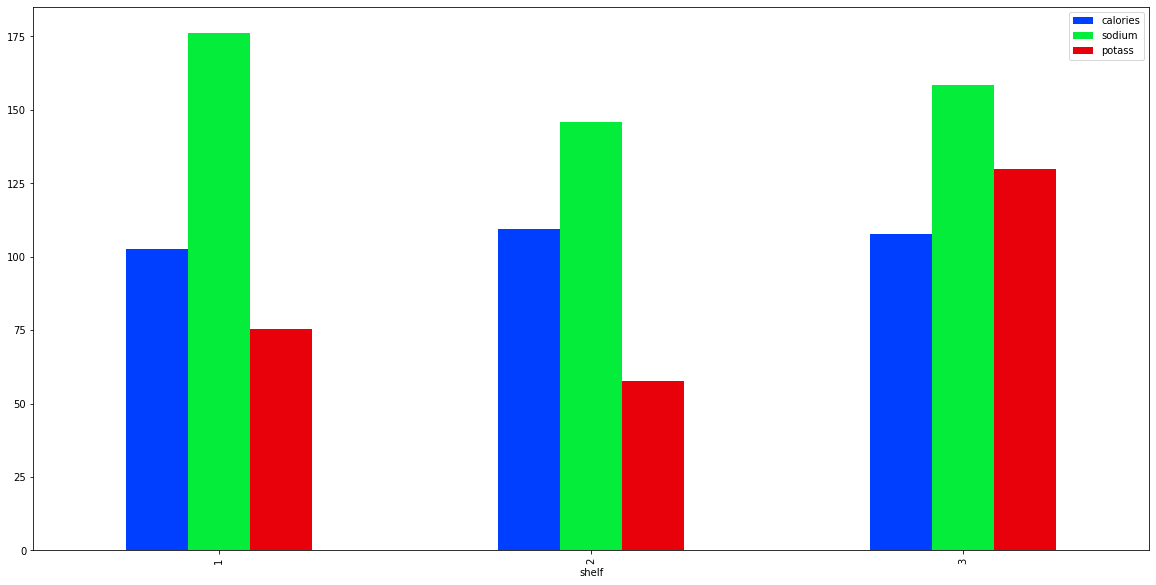

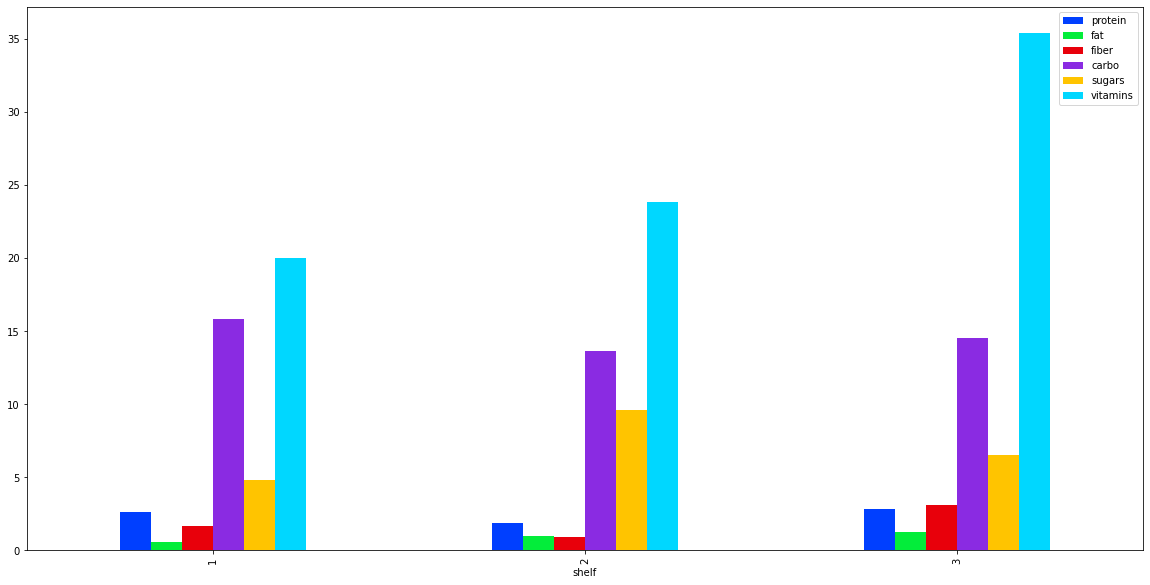

In [4]:
nutrition = ['calories','sodium','potass']
df.groupby('shelf')[nutrition].mean().plot.bar(figsize=(20,10))

nutrition = ['protein', 'fat', 'fiber',
             'carbo', 'sugars', 'vitamins']
df.groupby('shelf')[nutrition].mean().plot.bar(figsize=(20,10))

In [5]:
df.groupby(['mfr','shelf']).aggregate('count').unstack()

name            type            calories       \
shelf                          1    2     3    1    2     3        1    2   
mfr                                                                         
American Home Food Products  NaN  1.0   NaN  NaN  1.0   NaN      NaN  1.0   
General Mills                6.0  7.0   9.0  6.0  7.0   9.0      6.0  7.0   
Kelloggs                     4.0  7.0  12.0  4.0  7.0  12.0      4.0  7.0   
Nabisco                      3.0  2.0   1.0  3.0  2.0   1.0      3.0  2.0   
Post                         2.0  1.0   6.0  2.0  1.0   6.0      2.0  1.0   
Quaker Oats                  1.0  3.0   4.0  1.0  3.0   4.0      1.0  3.0   
Ralston Purina               4.0  NaN   4.0  4.0  NaN   4.0      4.0  NaN   

                                  protein  ... vitamins weight             \
shelf                           3       1  ...        3      1    2     3   
mfr                                        ...                              
American Home Food Products   NaN     NaN  ...      NaN    NaN  1.0   NaN   
General Mills                 9.0     6.0  ...      9.0    6.0  7.0   9.0   
Kelloggs                     12.0     4.0  ...     12.0    4.0  7.0  12.0   
Nabisco                       1.0     3.0  ...      1.0    3.0  2.0   1.0   
Post                          6.0     2.0  ...      6.0    2.0  1.0   6.0   
Quaker Oats                   4.0     1.0  ...      4.0    1.0  3.0   4.0   
Ralston Purina                4.0     4.0  ...      4.0    4.0  NaN   4.0   

                            cups            rating             
shelf                          1    2     3      1    2     3  
mfr                                                            
American Home Food Products  NaN  1.0   NaN    NaN  1.0   NaN  
General Mills                6.0  7.0   9.0    6.0  7.0   9.0  
Kelloggs                     4.0  7.0  12.0    4.0  7.0  12.0  
Nabisco                      3.0  2.0   1.0    3.0  2.0   1.0  
Post                         2.0  1.0   6.0    2.0  1.0   6.0  
Quaker Oats                  1.0  3.0   4.0    1.0  3.0   4.0  
Ralston Purina               4.0  NaN   4.0    4.0  NaN   4.0  

[7 rows x 42 columns]

<AxesSubplot:xlabel='shelf', ylabel='Count'>

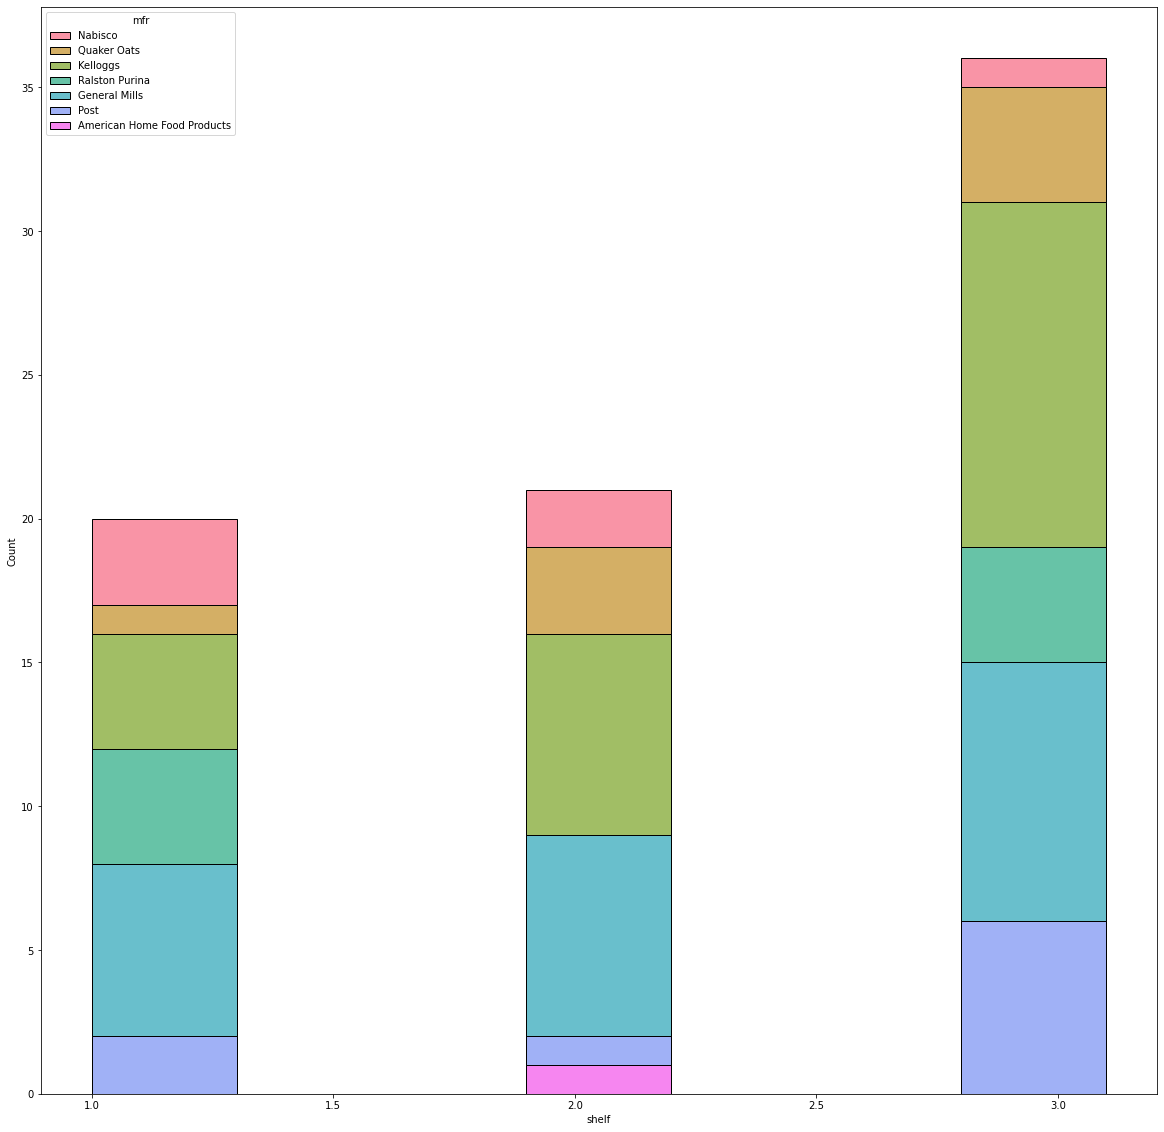

In [6]:
plt.figure(figsize=(20,20))
sns.histplot(binwidth=0.3, x="shelf", hue="mfr", data=df, stat="count", multiple="stack")